In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from sklearn.datasets import make_blobs


In [71]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
df=df.iloc[:,[3,4]]
df.head()
print(df.dtypes)

Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [73]:
# from sklearn.cluster import KMeans
# wcss = [] for i in range(1, 11): 
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X) 
#     wcss.append(kmeans.inertia_)


print(df.shape)
print(type(df))


(200, 2)
<class 'pandas.core.frame.DataFrame'>


     Annual Income (k$)  Spending Score (1-100)
112                  64                      42
115                  65                      50
171                  87                      75
187                 101                      68
65                   48                      59


[]

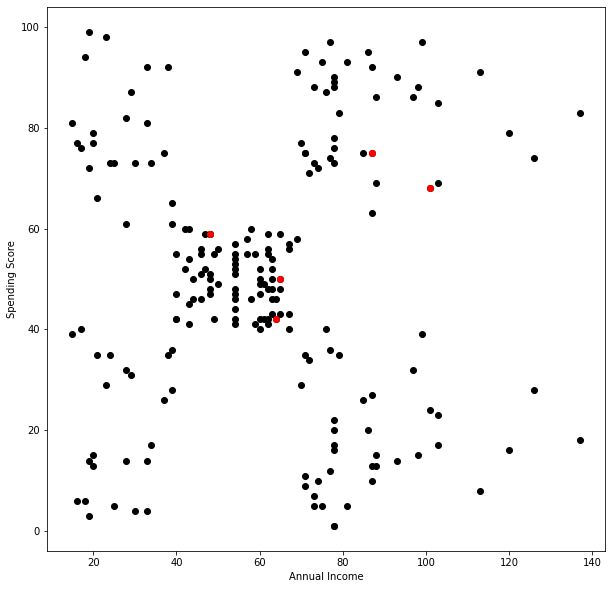

In [98]:
#number of clusters
rd.seed(42)
K=5
Centroids=df.sample(n=K)
new_Cen=Centroids.copy()
print(Centroids)

plt.figure(figsize=(10,10))
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c='black')
plt.scatter(x=Centroids['Annual Income (k$)'],y=Centroids['Spending Score (1-100)'],c='red')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.plot()

 #diff=self.Centroids-previous_centroids

            # if not diff.any():
            #     break

In [95]:
d=df.values
Centroids=Centroids.values
print(type(Centroids))
print(Centroids)
print(type(d))


<class 'numpy.ndarray'>
[[57 58]
 [40 55]
 [54 41]
 [47 52]
 [67 56]]
<class 'numpy.ndarray'>


# Using Dataset

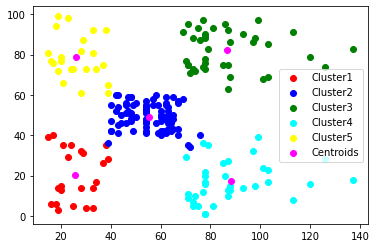

[15 16 17 18 19 19 20 20 21 23 24 25 28 28 29 30 33 33 34 37 38 39]
[[25.72727273 20.22727273]
 [55.2962963  49.20987654]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 78.56521739]]


In [122]:
class KMeans_Clustering:

    def __init__(self,X,number_of_clusters):

        self.number_of_clusters=number_of_clusters
        self.max_iterations=10
        self.n_sample,self.n_features=X.shape
        self.plot_figure=True
        #self.Centroids=Centroids

    def create_cluster(self,X,Centroids):

        clusters= [[] for _ in range(self.number_of_clusters)]
        dist=0
        for point_idx , point in enumerate(X):
            
            # print(point_idx)
            # print(point)
            # print(type(Centroids))
            # dist= sum(min((point-Centroids))**2)

            closest_centroid = np.argmin(np.sqrt(np.sum((point-Centroids)**2,axis=1)))
           # print(closest_centroid)
# Gives the index of centroid having minimum distance from the point

            clusters[closest_centroid].append(point_idx)
           # print(clusters)
        
        return clusters,dist
    
    def calculate_new_centroids(self,clusters,X):

        Centroids=np.zeros((self.number_of_clusters,self.n_features))

        for idx ,cluster in enumerate(clusters):
            # print(idx)
            # print(X[cluster])
            new_centroid=np.mean(X[cluster],axis=0)

            Centroids[idx] = new_centroid
            
        return Centroids
    
    def predict_cluster(self,clusters,X):

        y_pred=np.zeros(self.n_sample)

        for cluster_idx , cluster in enumerate(clusters):

            for sample_idx in cluster:

                y_pred[sample_idx] = cluster_idx
            
        return y_pred
    
    def plot_fig(self,X,Y,centers):
        
       #   plt.scatter(X[:,0],X[:,1],c=Y)  can also do using this
       # or this 
        plt.scatter(X[Y==0,0],X[Y==0,1],label="Cluster1",c='red')
        plt.scatter(X[Y==1,0],X[Y==1,1],label="Cluster2",c='blue')
        plt.scatter(X[Y==2,0],X[Y==2,1],label="Cluster3",c='green')
        plt.scatter(X[Y==3,0],X[Y==3,1],label="Cluster4",c='cyan')
        plt.scatter(X[Y==4,0],X[Y==4,1],label="Cluster5",c='yellow')
        plt.scatter(x=centers[:,0],y=centers[:,1],c='magenta',label="Centroids")
        plt.legend()

        plt.show()

    def fit(self,X,Centroids):

        self.Centroids=Centroids

        for _ in range(self.max_iterations):

            clusters,dist=self.create_cluster(X,Centroids)

            previous_centroids=Centroids
            Centroids=self.calculate_new_centroids(clusters,X)
            
            centers=Centroids

        y_pred=self.predict_cluster(clusters,X)

        if self.plot_figure: # if true

            self.plot_fig(X,y_pred,centers)
        
       # print(y_pred)
        
        return y_pred,centers,dist
    
if __name__=="__main__":
    
    # K = 3 # num of cluster
    # X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) # create dataset using make_blobs from sklearn datasets
   
    Kmeans=KMeans_Clustering(d,K)
    
    y_pred,centers,dist=Kmeans.fit(d,Centroids)
   # print(d)
   # print(d[y_pred==0,0])
   # print(centers)
    
       
       

# Create dataset using make_blobs from sklearn 

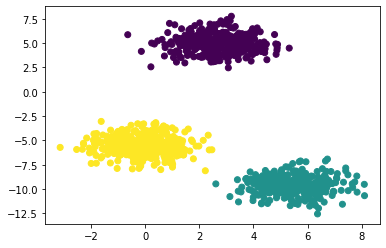

In [87]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        
        return clusters 
    
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.show() # visualize
    
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function 
        return y_pred
            
if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 3 # num of cluster
    X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) # create dataset using make_blobs from sklearn datasets
    # print(X.shape)
    # print(X.dtype)
    # print(X[:,1])
    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)